In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Get working directory path
PWD = os.getcwd()
# Get input directory path
INPUT_DIR = os.path.join(PWD, 'input')
# Get dataset path
DATASET_PATH = os.path.join(INPUT_DIR, 'spambase.csv')

In [ ]:
# Function to get column names
def get_column_names():
    """
    Get list of column names from UCI provided .names file
    Input:
        N/A
    Output:
        A list of column names for the dataset
    """
    file = open(os.path.join(INPUT_DIR, 'spambase.names'), 'r')
    result = []
    while True:
        line = file.readline()
        if (not line):
            break
        else:
            if (line.startswith('word_freq_') or (line.startswith('char_freq_')) or (line.startswith('capital_run'))):
                line = line.split(':')
                result.append(line[0])
    result.append('Target')
    return result

In [ ]:
# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, title=None):
    plt.title(title)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()

In [ ]:
# Simple counts of spam and ham messages
# Get column names for DataFrame
col_names = get_column_names()
# Read data
data = pd.read_csv(DATASET_PATH, names=col_names)
# Number of training examples
num_training_examples = len(data)
# Number of spam examples
spam_counts = len(data.loc[data['Target'] == 1, 'Target'])
# Number of ham examples
ham_counts = len(data.loc[data['Target'] == 0, 'Target'])
print(f'The number of training examples, spam instances, and ham instances: {num_training_examples}, {spam_counts}, and {ham_counts}')

The number of training examples, spam instances, and ham instances: 4601, 1813, and 2788


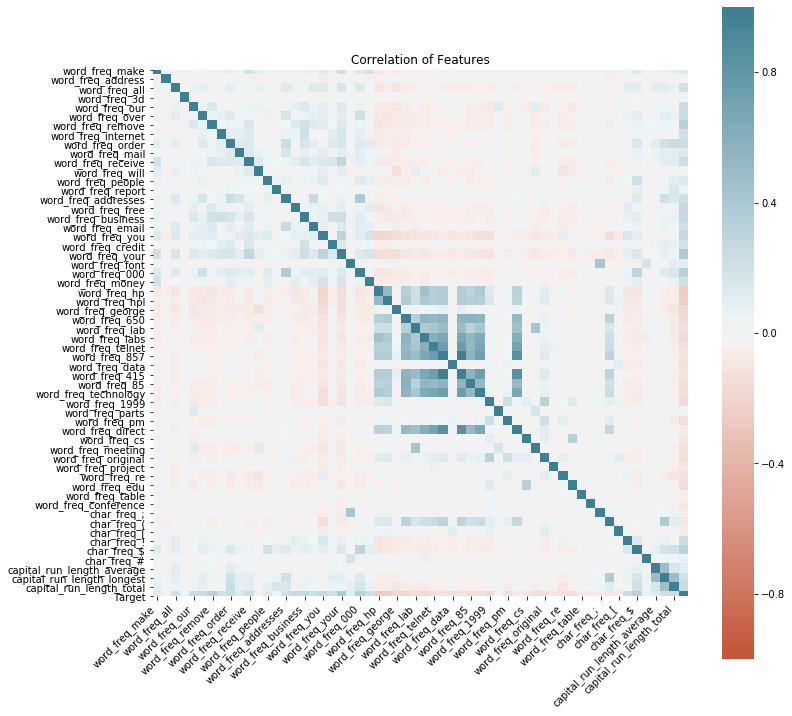

In [ ]:
# Get correlation matrix of the data
corr_matrix = data.corr()
# Make heatmap (source: https://tinyurl.com/y57cjn3w)
plt.figure(figsize=(12,12))
plt.title('Correlation of Features')
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Positive examples >= mean of message lengths (above threshold): 1043
Negative examples < mean of message lengths (below threshold): 1791
The length of messages has more indication of being more spam than ham due to the number of spam examples provided some threshold (the mean: 9.940312323407964) on length of messages
--------------------------------
Number of instances where Target == spam AND "free" was present: 989
Number of instances where Target == ham AND "free" was present: 252
Number of instances where Target == spam AND "free" was not present: 824
Number of instances where Target == ham AND "free" was not present: 2536
The shear number of ham instances where the word "free" was not present says that most ham messages did not include the word "free". Furthermore, the percentage of spam instances where the word "free" was present is equal ~80% ((989)/(989 + 252))
--------------------------------


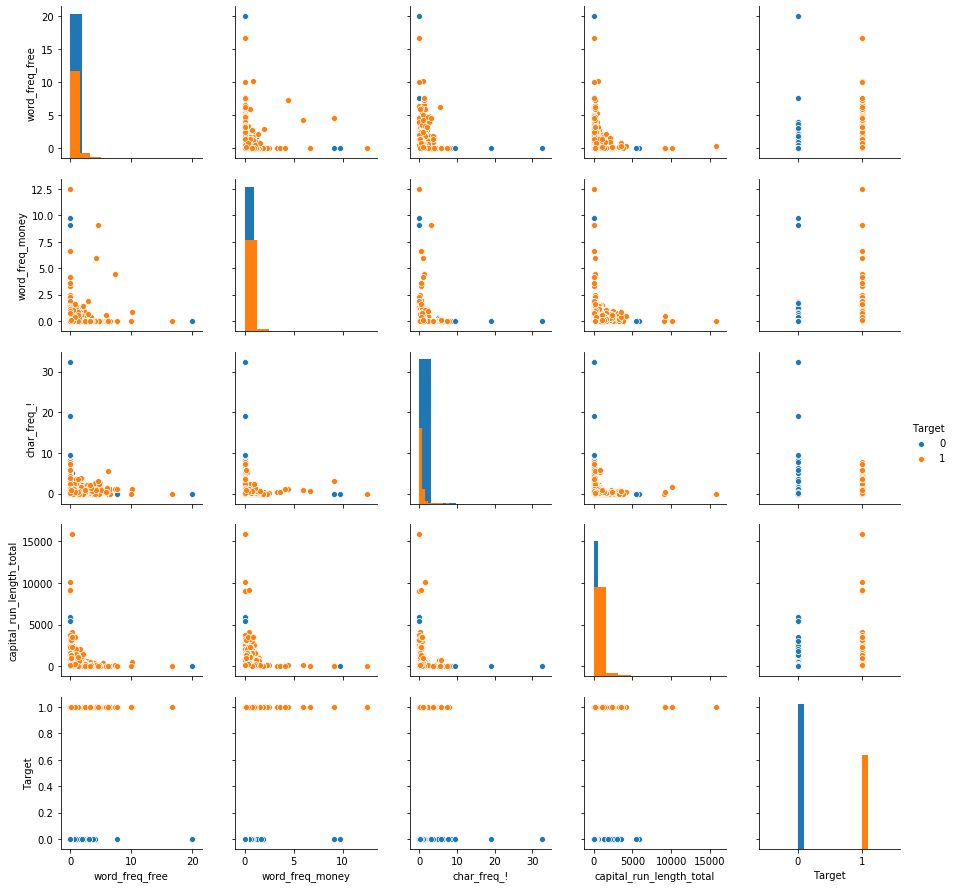

In [ ]:
# Does the length of messages indicate spam/ham separation?
# Create DataFrame of total sum of words (columns[1-54]), and data labels
mess_len_df = pd.DataFrame()
mess_len_df['Target'] = data['Target']
# Store each instance's message length
instance_mess_lengths = []
# Column names of the dataset
col_names = list(data.columns)
# Remove the columns that don't help determine message length
col_names.remove('capital_run_length_average')
col_names.remove('capital_run_length_longest')
col_names.remove('capital_run_length_total')
col_names.remove('Target')
# Iterate over rows of the data set, sum the rows according to column names in col_names, and put them in instance_mess_lengths
for index, row in data.iterrows():
    instance_mess_lengths.append(sum(row[col_names]))
    
mess_len_df['MessageLengths'] = instance_mess_lengths

mean = mess_len_df['MessageLengths'].mean()
num_pos_threshold = len(mess_len_df.loc[(mess_len_df['Target'] == 1) & (mess_len_df['MessageLengths'] >= mean), 'MessageLengths'])
num_neg_threshold = len(mess_len_df.loc[(mess_len_df['Target'] == 0) & (mess_len_df['MessageLengths'] < mean), 'MessageLengths'])
print(f'Positive examples >= mean of message lengths (above threshold): {num_pos_threshold}')
print(f'Negative examples < mean of message lengths (below threshold): {num_neg_threshold}')
print(f'The length of messages has more indication of being more spam than ham due to the number of spam examples provided some threshold (the mean: {mean}) on length of messages')
print('--------------------------------')

# How about the precense or absence of certain words like "free"?
# Count number of times instance == spam or ham when frequency of "free" > 1
count_free_with_spam = len(data.loc[(data['word_freq_free'] > 0) & (data['Target'] == 1), 'word_freq_free'])
count_free_with_ham = len(data.loc[(data['word_freq_free'] > 0) & (data['Target'] == 0), 'word_freq_free'])
count_no_free_spam = len(data.loc[(data['word_freq_free'] == 0) & (data['Target'] == 1), 'word_freq_free'])
count_no_free_ham = len(data.loc[(data['word_freq_free'] == 0) & (data['Target'] == 0), 'word_freq_free'])
print(f'Number of instances where Target == spam AND "free" was present: {count_free_with_spam}')
print(f'Number of instances where Target == ham AND "free" was present: {count_free_with_ham}')
print(f'Number of instances where Target == spam AND "free" was not present: {count_no_free_spam}')
print(f'Number of instances where Target == ham AND "free" was not present: {count_no_free_ham}')
print('The shear number of ham instances where the word "free" was not present says that most ham messages did not include the word "free". Furthermore, the percentage of spam instances where the word "free" was present is equal ~80% ((989)/(989 + 252))')
print('--------------------------------')

# Plot the distributions and spread of the two classes across a few such features that you construct
attributes = ['word_freq_free', 'word_freq_money', 'char_freq_!', 'capital_run_length_total', 'Target']
sns.pairplot(data[attributes], hue='Target', diag_kind='hist')

In [ ]:
# Get labels column
data_labels = data.pop('Target')

C:\Users\Alex-\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Alex-\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Alex-\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Alex-\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Alex-\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Average accuracy for logistic regression: 0.9182469167993521
Average accuracy for naive Bayes: 0.7863132469394016


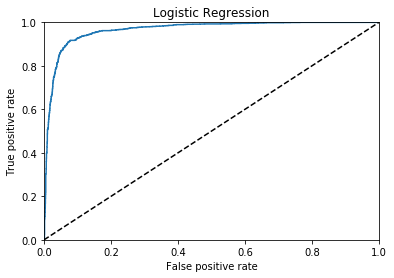

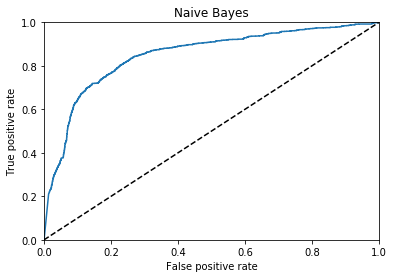

In [ ]:
# Use sklearn logistic regression and sklearn naive Bayes and compare the results using 10 fold cross validation.
log_reg = LogisticRegression()
naive_bayes = MultinomialNB()
# Fit the models
log_reg.fit(data, data_labels)
naive_bayes.fit(data, data_labels)

# Evaluate the models
log_reg_scores = cross_val_score(log_reg, data, data_labels, scoring='accuracy', cv=10)
log_reg_decision_functions = cross_val_predict(log_reg, data, data_labels, method='decision_function', cv=10)
naive_bayes_scores = cross_val_score(naive_bayes, data, data_labels, scoring='accuracy', cv=10)
naive_bayes_probs = naive_bayes.predict_proba(data)
naive_bayes_preds = naive_bayes_probs[:, 1]

# What is the accuracy of both?
log_reg_avg_acc = sum(log_reg_scores) / len(log_reg_scores)
naive_bayes_avg_acc = sum(naive_bayes_scores) / len(naive_bayes_scores)
print(f'Average accuracy for logistic regression: {log_reg_avg_acc}')
print(f'Average accuracy for naive Bayes: {naive_bayes_avg_acc}')

# Plot the two AUCs
log_reg_fpr, log_reg_tpr, log_reg_thresholds = roc_curve(data_labels, log_reg_decision_functions)
plot_roc_curve(log_reg_fpr, log_reg_tpr, "Logistic Regression")
nb_fpr, nb_tpr, nb_thresholds = roc_curve(data_labels, naive_bayes_preds)
plot_roc_curve(nb_fpr, nb_tpr, "Naive Bayes")